Prepare and Clean Data

In [1]:
###mount Google Drive 
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
###import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
import re
import scipy.stats as stats
from sklearn import metrics

from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import set_config
set_config(display = 'diagram')
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import plot_confusion_matrix
import sklearn
from sklearn.impute import SimpleImputer
from termcolor import colored as cl 
import seaborn as sb 
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')
### source (google colab shared to the class and Learn Platform and other readings cited below)

In [3]:
# use the dataset file  saved in the Google drive
filename = '/content/drive/MyDrive/Colab Notebooks/Machine Learning/exams.csv'
df = pd.read_csv(filename)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group A,some high school,standard,none,35,47,42
1,male,group A,master's degree,free/reduced,none,72,71,66
2,male,group A,high school,free/reduced,none,79,79,71
3,female,group B,some high school,free/reduced,completed,57,70,69
4,male,group B,some high school,free/reduced,none,51,44,39
...,...,...,...,...,...,...,...,...
995,female,group B,bachelor's degree,standard,completed,63,70,72
996,female,group B,some high school,standard,none,49,52,55
997,male,group B,associate's degree,standard,none,80,77,74
998,female,group D,high school,standard,none,79,81,76


In [4]:
### determine the null values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
### get the statistical summary of the numerical data 
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,67.04700,69.536000,68.259000
std,14.82385,14.643946,15.414523
min,19.00000,20.000000,22.000000
25%,58.00000,60.000000,58.000000
50%,68.00000,70.000000,69.000000
75%,77.00000,80.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
###data types
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [7]:
### check if there are still null values in the column
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
### check for duplicates
df.duplicated().sum()

2

In [9]:
df = df.drop_duplicates(keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       998 non-null    object
 1   race/ethnicity               998 non-null    object
 2   parental level of education  998 non-null    object
 3   lunch                        998 non-null    object
 4   test preparation course      998 non-null    object
 5   math score                   998 non-null    int64 
 6   reading score                998 non-null    int64 
 7   writing score                998 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 70.2+ KB


In [10]:
### check for inconsistencies in the categorical columns  from the dataset (source: learn platform, discussion, google colab notebook shared to the class)
categorical = df.select_dtypes(include =['object'])
cat_names = categorical.columns
for column in cat_names:
  print(df[column].unique())

['female' 'male']
['group A' 'group B' 'group D' 'group E' 'group C']
['some high school' "master's degree" 'high school' 'some college'
 "bachelor's degree" "associate's degree"]
['standard' 'free/reduced']
['none' 'completed']


In [11]:
# get column names
column_names = df.columns

# for each attributes (columns), print value counts
for column_name in  column_names:
    print(df[column_name].value_counts())

male      526
female    472
Name: gender, dtype: int64
group C    302
group D    268
group B    205
group E    147
group A     76
Name: race/ethnicity, dtype: int64
some college          241
associate's degree    221
high school           191
some high school      159
bachelor's degree     114
master's degree        72
Name: parental level of education, dtype: int64
standard        644
free/reduced    354
Name: lunch, dtype: int64
none         652
completed    346
Name: test preparation course, dtype: int64
72    35
65    31
64    30
73    29
70    28
      ..
38     1
30     1
25     1
31     1
28     1
Name: math score, Length: 75, dtype: int64
68    36
64    33
79    32
69    29
83    28
      ..
32     1
29     1
36     1
20     1
25     1
Name: reading score, Length: 72, dtype: int64
71    34
76    31
63    28
64    27
61    27
      ..
28     1
31     1
32     1
24     1
30     1
Name: writing score, Length: 76, dtype: int64


In [12]:
### Convert the string names of the parental level of education to numeric values.
df['parental level of education'] = df['parental level of education'].replace ({'some high school': 0, 'high school': 1, 'some college': 2, "associate's degree": 3, "bachelor's degree": 4, "master's degree": 5})

In [13]:
#check teh relation of the parental level of education to teh success of the applicants admission 
X = df.drop(columns = 'parental level of education')
y = df['parental level of education']

In [14]:
X.head()

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score
0,female,group A,standard,none,35,47,42
1,male,group A,free/reduced,none,72,71,66
2,male,group A,free/reduced,none,79,79,71
3,female,group B,free/reduced,completed,57,70,69
4,male,group B,free/reduced,none,51,44,39


In [15]:
y.head()

0    0
1    5
2    1
3    0
4    0
Name: parental level of education, dtype: int64

In [16]:
from pandas.core.dtypes.generic import create_pandas_abc_type
### transform categorical values into numeric
from sklearn.compose import make_column_selector
cat_sel = make_column_selector(dtype_include='object')
cat_df = X[cat_sel(X)]
for col_name in cat_df.columns:
    print(col_name)
### identify the unique values from that column
    values = df[col_name].unique()
### initialize the dictionary
    col_dict = dict()
    for index, value in enumerate(values):
        col_dict[value] = index

### print the col_dict and replace categorical values in the identified columns
    X[col_name].replace(col_dict, inplace=True)

X.head()

gender
race/ethnicity
lunch
test preparation course


,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score
0,0,0,0,0,35,47,42
1,1,0,1,0,72,71,66
2,1,0,1,0,79,79,71
3,0,1,1,1,57,70,69
4,1,1,1,0,51,44,39


In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   gender                   998 non-null    int64
 1   race/ethnicity           998 non-null    int64
 2   lunch                    998 non-null    int64
 3   test preparation course  998 non-null    int64
 4   math score               998 non-null    int64
 5   reading score            998 non-null    int64
 6   writing score            998 non-null    int64
dtypes: int64(7)
memory usage: 62.4 KB


In [18]:
### separate numerical and categorical variables
### categorical columns
categ_column=[column for column in df.columns if df[column].dtype=='object']
### numerical columns
numeric_column=df.drop(categ_column,axis=1).columns
### source (https://datascience.stackexchange.com/questions/98137/separate-numerical-and-categorical-variables)

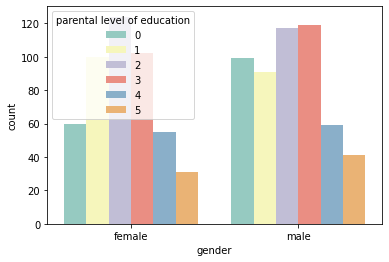

<Figure size 360x576 with 0 Axes>

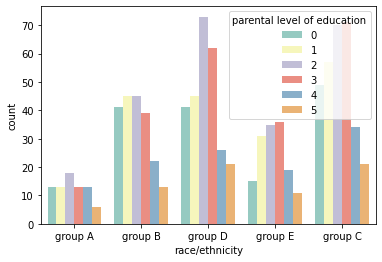

<Figure size 360x576 with 0 Axes>

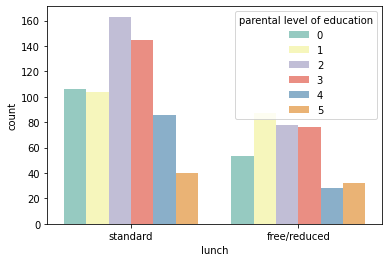

<Figure size 360x576 with 0 Axes>

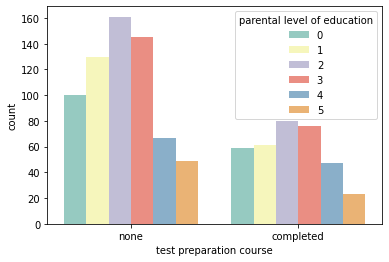

<Figure size 360x576 with 0 Axes>

In [19]:
### visualize data using count plot in categorical data
### add filter warnings
warnings.filterwarnings('ignore')
for column in categ_column:
    sns.countplot(df[column],hue=df['parental level of education'], palette="Set3")
    plt.figure(figsize=(5,8))
    plt.show()

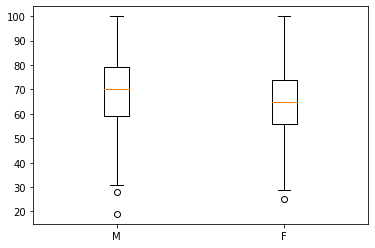

In [20]:
### data visualization using boxplot for the "Age" and "match scorer"
### delete whitespace
df['Gender'] = df['gender'].apply(lambda x: x.strip())
male = df.loc[df['gender']=='male','math score'].values
female = df.loc[df['gender']=='female','math score'].values
### show the boxplot
plt.boxplot([male, female], labels=['M', 'F']);

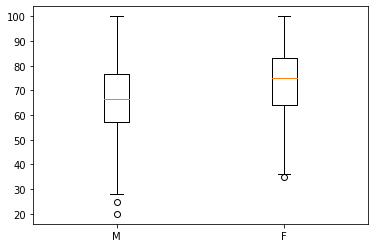

In [21]:
### data visualization using boxplot for the "Age" and "reading score"
### delete whitespace
df['Gender'] = df['gender'].apply(lambda x: x.strip())
male = df.loc[df['gender']=='male','reading score'].values
female = df.loc[df['gender']=='female','reading score'].values
### show the boxplot
plt.boxplot([male, female], labels=['M', 'F']);

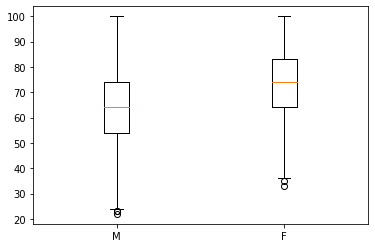

In [22]:
### data visualization using boxplot for the "male" and "writing score"
### delete whitespace
df['Gender'] = df['gender'].apply(lambda x: x.strip())
male = df.loc[df['gender']=='male','writing score'].values
female = df.loc[df['gender']=='female','writing score'].values
### show the boxplot
plt.boxplot([male, female], labels=['M', 'F']);

count    998.000000
mean      67.056112
std       14.811584
min       19.000000
25%       58.000000
50%       68.000000
75%       77.000000
max      100.000000
Name: math score, dtype: float64


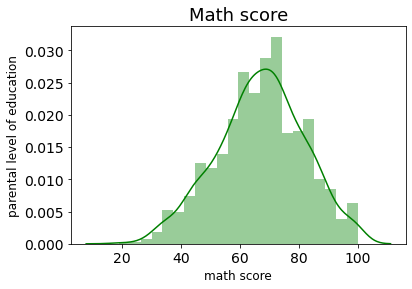

In [23]:
# math score vs parental level of education 

print(cl(df['math score'].describe(), attrs = ['bold']))

sb.distplot(df['math score'], 
            color = 'green')
plt.title('Math score', 
          fontsize = 18)
plt.xlabel('math score', 
           fontsize = 12)
plt.ylabel('parental level of education', 
           fontsize = 12)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('math score distribution.png')
plt.show()

count    998.000000
mean      69.535070
std       14.638824
min       20.000000
25%       60.000000
50%       70.000000
75%       80.000000
max      100.000000
Name: reading score, dtype: float64


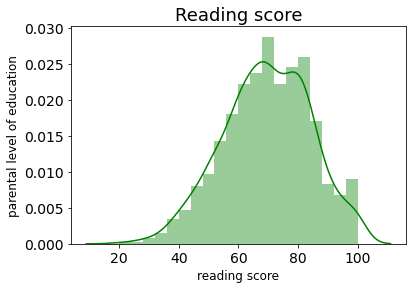

In [24]:
# reading score vs parental level of education 

print(cl(df['reading score'].describe(), attrs = ['bold']))

sb.distplot(df['reading score'], 
            color = 'green')
plt.title('Reading score', 
          fontsize = 18)
plt.xlabel('reading score', 
           fontsize = 12)
plt.ylabel('parental level of education', 
           fontsize = 12)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('reading score distribution.png')
plt.show()

count    998.000000
mean      68.258517
std       15.418121
min       22.000000
25%       58.000000
50%       69.000000
75%       79.000000
max      100.000000
Name: writing score, dtype: float64


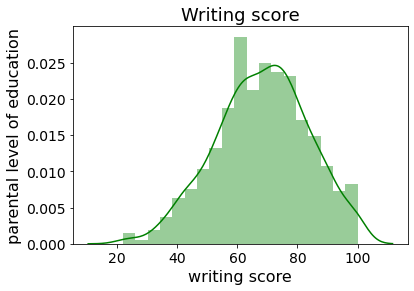

In [25]:
# writing score vs parental level of education 

print(cl(df['writing score'].describe(), attrs = ['bold']))

sb.distplot(df['writing score'], 
            color = 'green')
plt.title('Writing score', 
          fontsize = 18)
plt.xlabel('writing score', 
           fontsize = 16)
plt.ylabel('parental level of education', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('writing score distribution.png')
plt.show()

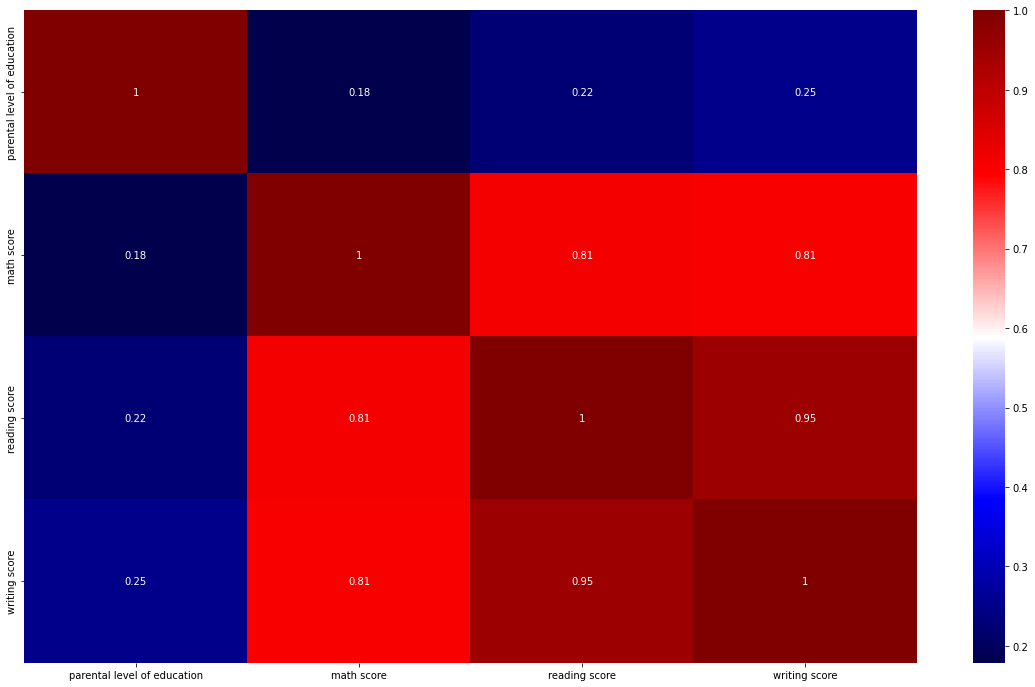

In [26]:
corrmat = df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corrmat, annot=True, cmap='seismic')

In [27]:
### split the dataset to training, test/validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)
### I chose 42 for the random state since this is the dfault value in sklearn, test size is 30% 
### source (https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/)

In [28]:
#### Obtain descriptive statistics of your features
X_train.describe().round(0)

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score
count,668.0,668.0,668.0,668.0,668.0,668.0,668.0
mean,1.0,2.0,0.0,0.0,67.0,70.0,68.0
std,0.0,1.0,0.0,0.0,15.0,15.0,16.0
min,0.0,0.0,0.0,0.0,19.0,25.0,23.0
25%,0.0,1.0,0.0,0.0,58.0,60.0,58.0
50%,1.0,2.0,0.0,0.0,67.0,70.0,69.0
75%,1.0,4.0,1.0,1.0,77.0,81.0,80.0
max,1.0,4.0,1.0,1.0,100.0,100.0,100.0


In [29]:
### check the lenght of the X_test
len(X_test)

330

In [30]:
### check the distribution of the training set
y_train.value_counts()

2    152
3    148
1    128
0    113
4     78
5     49
Name: parental level of education, dtype: int64

In [31]:
### check the distribution of the test set
y_test.value_counts()

2    89
3    73
1    63
0    46
4    36
5    23
Name: parental level of education, dtype: int64

In [32]:
### indetify the selectors
num_selector = make_column_selector(dtype_include = 'number')
cat_selector = make_column_selector(dtype_include='object')

In [33]:
### define the imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy = 'mean')
### add Scaler
scaler = StandardScaler()
### OneHotEncod
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse = False)

In [34]:
### create pipeline for numerical categorical
numeric_pipeline = make_pipeline(mean_imputer, scaler)
numeric_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [35]:
### create pipeline for categorical
categorical_pipeline = make_pipeline(freq_imputer, ohe)
categorical_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [36]:
### match/pair the pipeline and the corresponding selector
num_tuple = (numeric_pipeline, num_selector)
cat_tuple = (categorical_pipeline, cat_selector)
### build the pre-processor pipeline
preprocessor_pipeline = make_column_transformer(num_tuple, cat_tuple)
preprocessor_pipeline

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff419e62990>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff419e62b90>)])

In [37]:
### fit on train
preprocessor_pipeline.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff419e62990>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff419e62b90>)])

In [38]:
### transform train and test sets
X_train_processed = preprocessor_pipeline.transform(X_train)
X_test_processed = preprocessor_pipeline.transform(X_test)

In [39]:
### Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed.shape
### valdiate the new processed data's shape

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (668, 7)




(668, 7)

In [40]:
X_test_processed.shape

(330, 7)

In [41]:
### create the 1st model (Decision Tree)
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model

DecisionTreeClassifier(random_state=42)

In [42]:
model.fit(X_train_processed, y_train)

DecisionTreeClassifier(random_state=42)

In [43]:
### get the parameters
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [44]:
### evaluate the model (training) and (testing)
train_score_1= model.score(X_train_processed, y_train)
test_score_1 = model.score(X_test_processed, y_test)
print(train_score_1)
print(test_score_1)

0.9985029940119761
0.21818181818181817


In [45]:
### values to try for max_depth:
max_depth_range = list(range(2, 20))
### List to store the score for each value of max_depth:
r2 = []
for depth in max_depth_range:
    model = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    model.fit(X_train_processed, y_train)
    score = model.score(X_test_processed, y_test)
    r2.append(score)

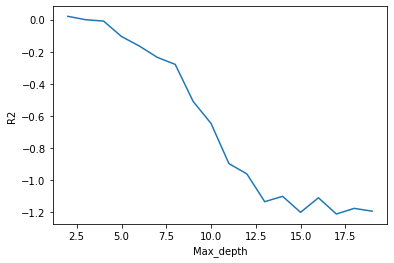

In [46]:
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('Max_depth')
plt.ylabel('R2');